# Data Understanding

In [573]:
#apr = abbreviation for Annual Percentage Rate: the rate at which someone who borrows money is charged, calculated over a period of twelve months
#Lead cost =  cost can be associated with various marketing and advertising expenses, such as online and offline advertising campaigns, lead generation websites, and sales and marketing teams
# principal = Principal is the money that you originally agreed to pay back



# Import neccessary libraries


In [215]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load Data 


In [296]:
# Load the loan(df), payment(df1) and clarity_underwriting_variables(df4) tables into pandas dataframes
df = pd.read_csv(r'E:/python/data\loan.csv')
df1 = pd.read_csv(r'E:/python/data\payment.csv')

In [217]:
df1.dtypes

loanId                object
installmentIndex       int64
isCollection            bool
paymentDate           object
principal            float64
fees                 float64
paymentAmount        float64
paymentStatus         object
paymentReturnCode     object
dtype: object

In [218]:
df2 = pd.read_csv(r'E:/python/data\clarity_underwriting_variables.csv', low_memory=False)

In [219]:
df2.dtypes

inquiry.thirtydaysago                                    float64
inquiry.twentyfourhoursago                               float64
inquiry.oneminuteago                                     float64
inquiry.onehourago                                       float64
inquiry.ninetydaysago                                    float64
inquiry.sevendaysago                                     float64
inquiry.tenminutesago                                    float64
inquiry.fifteendaysago                                   float64
inquiry.threesixtyfivedaysago                            float64
indicator.inquiryonfilecurrentaddressconflict             object
indicator.totalnumberoffraudindicators                   float64
indicator.telephonenumberinconsistentwithaddress          object
indicator.inquiryageyoungerthanssnissuedate               object
indicator.onfileaddresscautious                           object
indicator.inquiryaddressnonresidential                    object
indicator.onfileaddresshi

In [220]:
# Check for missing values for loan
print(df.isna().sum())


loanId                                 256
anon_ssn                                 0
payFrequency                          1273
apr                                   3922
applicationDate                          0
originated                               0
originatedDate                      531638
nPaidOff                                24
approved                                 0
isFunded                                 0
loanStatus                             391
loanAmount                            2250
originallyScheduledPaymentAmount         0
state                                  132
leadType                                 0
leadCost                                 0
fpStatus                            525959
clarityFraudId                      219989
hasCF                                    0
dtype: int64


# Data Cleaning

In [272]:
#Why check for missing values? 
#Bias -  missing data is not handled properly, it can lead to biased results. This is because the data that is missing is often not missing at random, but is missing for a reason that is related to the variables in the data.
#Lost of Information - When data is missing, information is lost, and this can reduce the statistical power of an analysis. 

In [221]:
# Check for missing values for payment
print(df1.isna().sum())

loanId                    0
installmentIndex          0
isCollection              0
paymentDate               0
principal                 0
fees                      0
paymentAmount             0
paymentStatus             0
paymentReturnCode    657831
dtype: int64


In [222]:
# Drop missing values for loan
df.dropna(inplace=True)
# Drop duplicates for loan
df.drop_duplicates(inplace=True)
# Drop missing values for payment
df1.dropna(inplace=True)
# Drop duplicates for payment
df1.drop_duplicates(inplace=True)

In [223]:

def filter_outliers(df, column_name, threshold=3):
    mean = df[column_name].mean()
    std = df[column_name].std()
    z = (df[column_name] - mean) / std
    df = df[(z < threshold) & (z > -threshold)]
    return df

# Apply the filter to the loan and payment dataset
df = filter_outliers(df, 'loanAmount')
df1 = filter_outliers(df1, 'paymentAmount')

In [224]:
# Merge the loan and payment data
m_l_p = pd.merge(df, df1, on='loanId', how='left')


In [225]:
#rename the clarityFraudId into underwritingid
m_l_p.rename({'clarityFraudId' : 'underwritingid'}, inplace = True, axis=1)

# Merge the m_l_p(merged_loan_payment) and df2(clarity_underwriting_variables) data
complete1 = pd.merge( m_l_p, df2, on='underwritingid', how='left')

In [226]:
complete1.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 42426 entries, 0 to 42425
Data columns (total 80 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   loanId                                                 42426 non-null  object 
 1   anon_ssn                                               42426 non-null  object 
 2   payFrequency                                           42426 non-null  object 
 3   apr                                                    42426 non-null  float64
 4   applicationDate                                        42426 non-null  object 
 5   originated                                             42426 non-null  bool   
 6   originatedDate                                         42426 non-null  object 
 7   nPaidOff                                               42426 non-null  float64
 8   approved                                      

In [227]:
complete1.head(3)

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,...,identityverification.nameaddressreasoncodedescription,identityverification.phonematchtypedescription,identityverification.overallmatchresult,identityverification.phonetype,identityverification.ssndobreasoncode,identityverification.ssnnamereasoncode,identityverification.nameaddressreasoncode,identityverification.ssndobmatch,identityverification.overallmatchreasoncode,clearfraudscore
0,LL-I-17826953,7529d29c9d943cc55bc71a85d9c6b7a3,W,645.0,2017-03-01T15:55:41.823000,True,2017-03-01T16:15:13.016000,0.0,True,1,...,NaN,(U) Unlisted,match,NaN,NaN,NaN,NaN,match,1.0,658.0
1,LL-I-16519347,bc9fa73468acf18cb968a3a6a3c4697c,S,490.0,2017-01-31T17:48:17.381000,True,2017-01-31T18:00:14.520000,2.0,True,1,...,(A8) Match to Last Name only,(M) Mobile Phone,partial,NaN,NaN,NaN,A8,match,6.0,835.0
2,LL-I-11506719,10cefd11d41612b032fd9cd2debe32dc,B,590.0,2016-08-27T09:08:05.442000,True,2016-08-29T15:05:04.014000,0.0,True,1,...,NaN,(P) Pager,match,NaN,NaN,NaN,NaN,match,1.0,624.0


In [228]:
#Basic Statistical Measures
print(df1.describe())

       installmentIndex     principal          fees  paymentAmount
count      31086.000000  31086.000000  31086.000000   31086.000000
mean           5.092871     24.890811     83.384708     108.962576
std            4.518953     30.231061     56.524965      67.315306
min            1.000000      0.000000      0.000000       0.000000
25%            2.000000      7.490000     44.380000      63.040000
50%            4.000000     15.250000     69.705000      89.940000
75%            7.000000     31.410000    105.197500     136.080000
max           51.000000    408.450000    431.350000     441.900000


In [229]:
print(df.describe())

                apr      nPaidOff      isFunded    loanAmount  \
count  31455.000000  31455.000000  31455.000000  31455.000000   
mean     541.650111      0.173009      0.999396    592.136179   
std      118.167241      0.609073      0.024570    313.628459   
min       29.990000      0.000000      0.000000    100.000000   
25%      449.990000      0.000000      1.000000    400.000000   
50%      590.000000      0.000000      1.000000    500.000000   
75%      645.000000      0.000000      1.000000    700.000000   
max      681.000000     20.000000      1.000000   2050.000000   

       originallyScheduledPaymentAmount      leadCost    hasCF  
count                      31455.000000  31455.000000  31455.0  
mean                        1648.918350     13.815037      1.0  
std                          906.333465     20.696944      0.0  
min                          188.410000      0.000000      1.0  
25%                         1064.180000      3.000000      1.0  
50%                     

# Data Exploration and Visualisation

## Loan.csv with Payment.csv

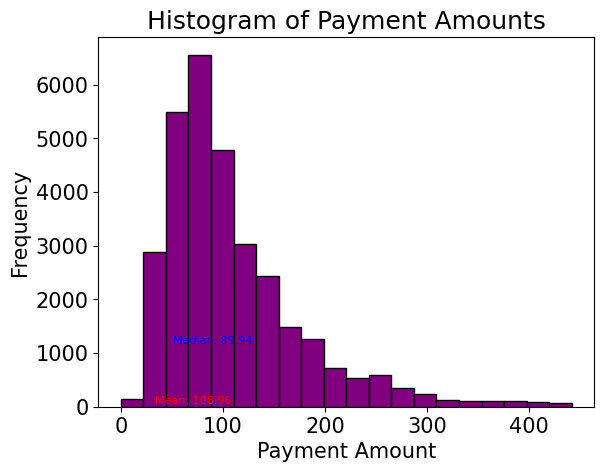

In [230]:
import matplotlib.pyplot as plt
import pandas as pd
# Plot the histogram of the 'paymentAmount' column
plt.hist(df1["paymentAmount"], bins=20, color='purple', edgecolor='black')

# Add a title and labels to the x and y axes
plt.title("Histogram of Payment Amounts")
plt.xlabel("Payment Amount")
plt.ylabel("Frequency")

# Add text to the plot to describe the mean and median values
mean = df1["paymentAmount"].mean()
median = df1["paymentAmount"].median()
plt.text(mean, 50, f"Mean: {mean:.2f}", ha='right', fontsize=8, color='red')
plt.text(median, 1170, f"Median: {median:.2f}", ha='center', fontsize=8, color='blue')
# Show the plot
plt.show()

In [231]:
#We can see that most of the payment amount is from the range of 90 to 109

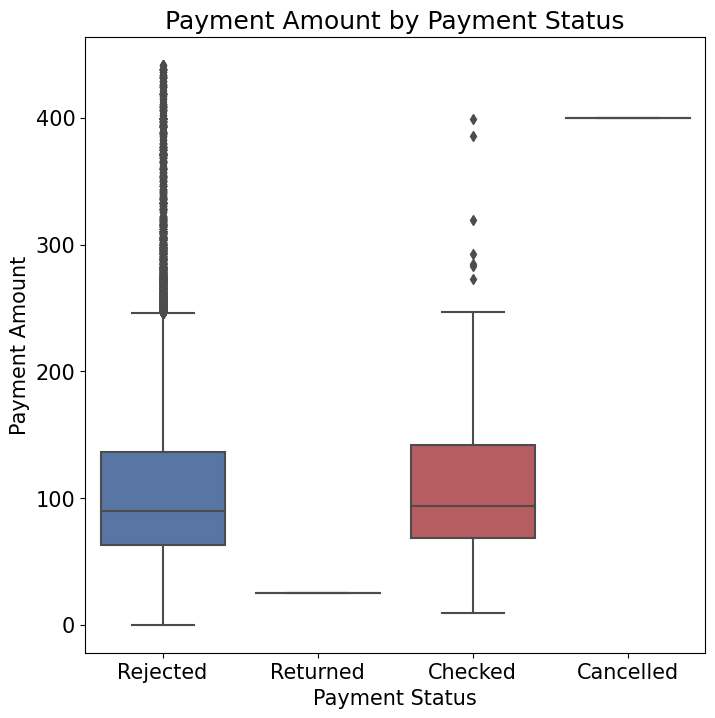

In [232]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Box Plots
plt.figure(figsize=(8,8))
sns.boxplot(x='paymentStatus', y='paymentAmount', data=df1)
plt.title('Payment Amount by Payment Status')
plt.xlabel('Payment Status')
plt.ylabel('Payment Amount')
plt.show()



In [233]:
#quick idea of the range and spread of payment amount for each payment status.
#to identify outliers and any significant differences in payment amounts between the different payment statuses.
#median payment amount of rejected loans is lower than checked loans meaning there are more applicants have higher financial resources to make payments.

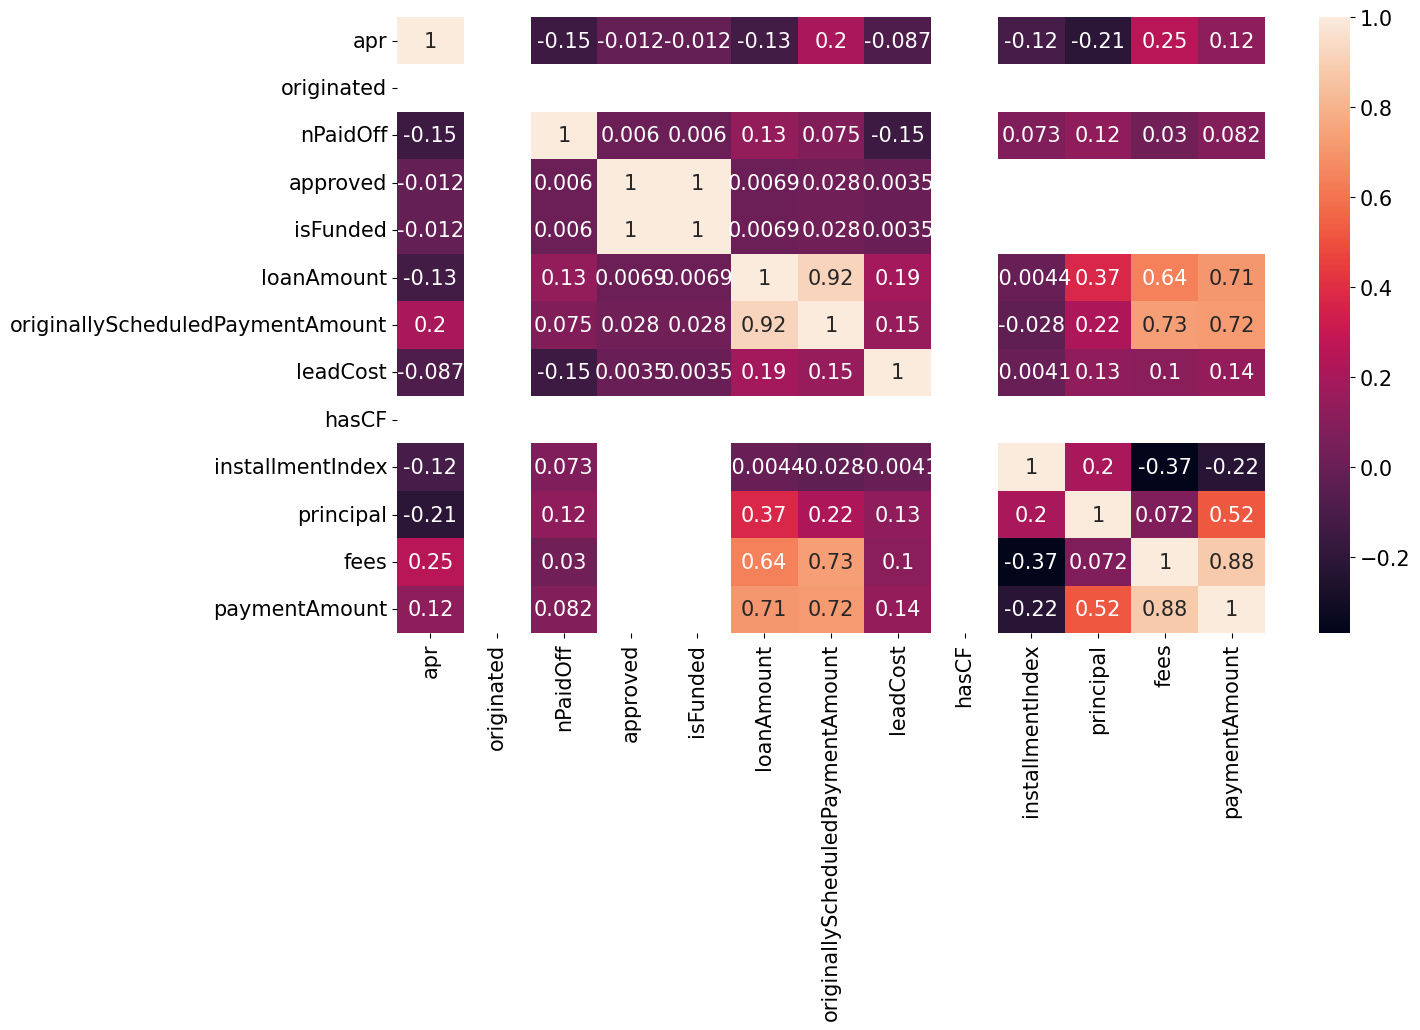

In [572]:
# Correlation Matrix
corr = m_l_p.corr()
plt.figure(figsize=(14,8))
# Heatmap
sns.heatmap(corr, annot=True)
plt.show()

In [235]:
#loanAmount and originallyScheduledPaymentAmount has strong relatioship. This means that the Moneylion sets the scheduled payment amount based on the loan amount.
#loanamount is an important factor in determining the payment amount for a loan.

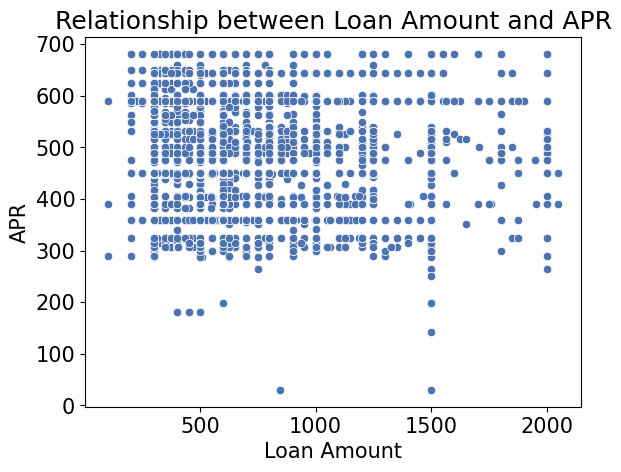

In [236]:
# Plot a scatter plot to see the relationship between loan amount and APR
sns.scatterplot(x='loanAmount', y='apr', data=m_l_p)
plt.xlabel('Loan Amount')
plt.ylabel('APR')
plt.title('Relationship between Loan Amount and APR')
plt.show()

In [237]:
#From here, i deduce that Moneylion only selectively pick borrowers that has certain criteria to have low ANNUAL PERCENTAGE RATE. To understand this we need info such as background check data.

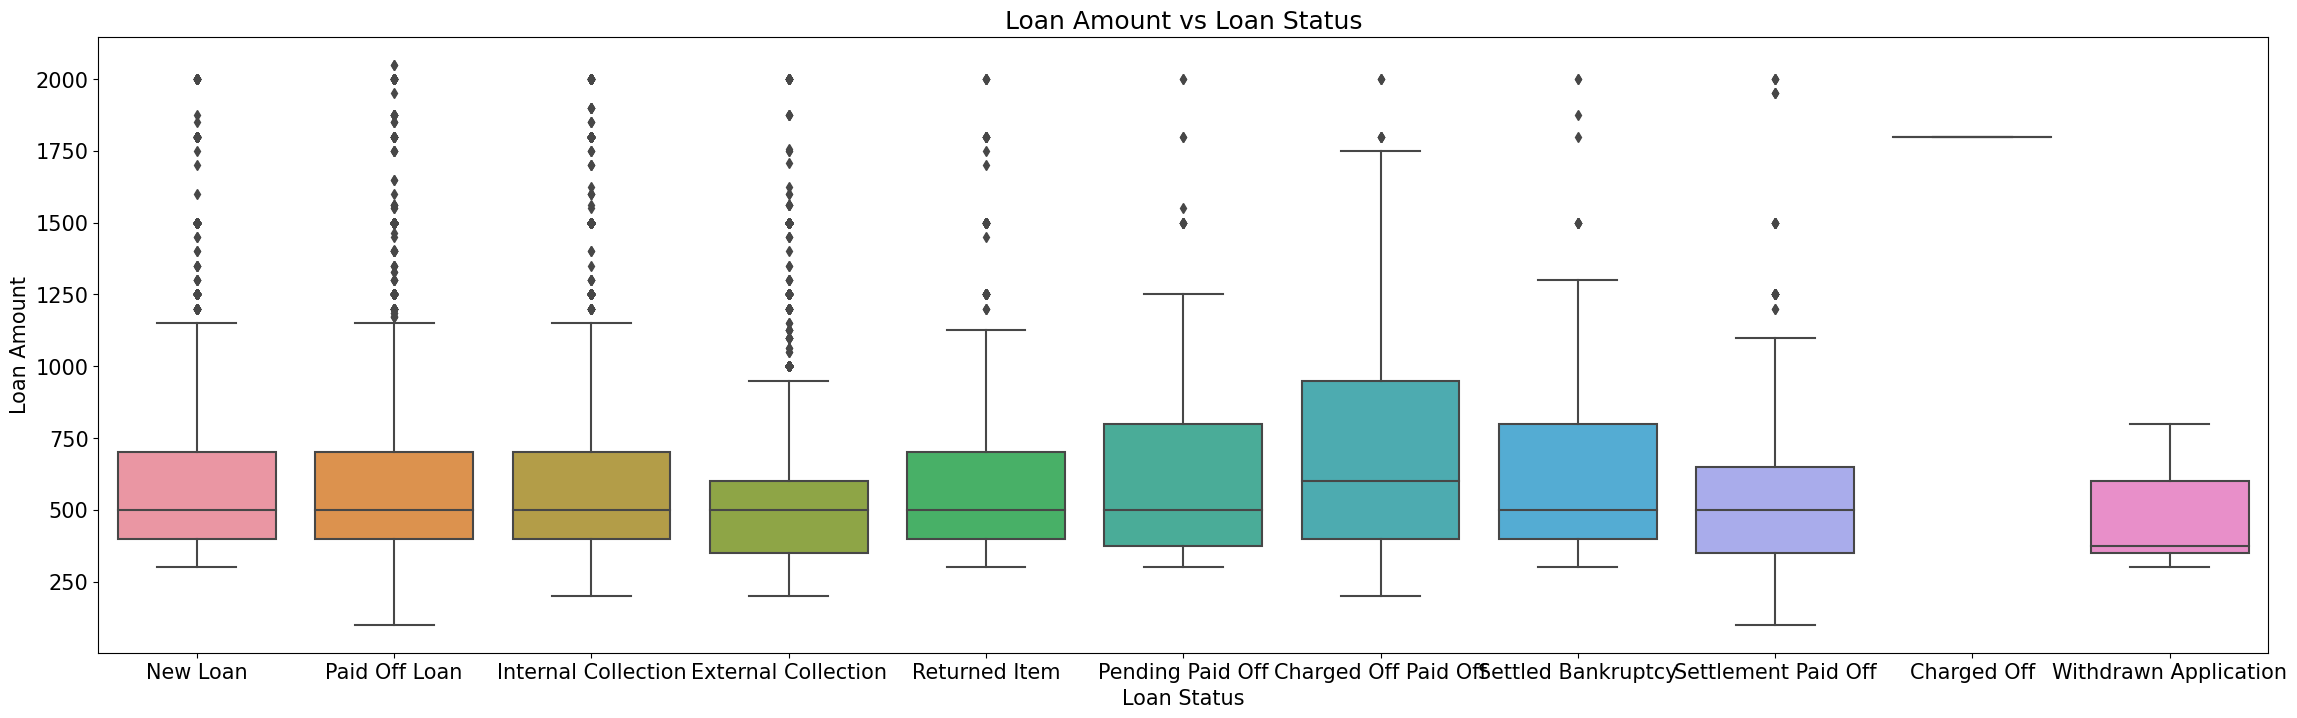

In [238]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot the relationship between loan amount and loan status
plt.figure(figsize=(28,8))
sns.boxplot(x='loanStatus', y='loanAmount', data=m_l_p)
plt.title('Loan Amount vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.show()

In [239]:
# from here we can see that charged off loans is wider than paid off loan. This suggests that there is a wider range of default risk for loans with higher amounts.

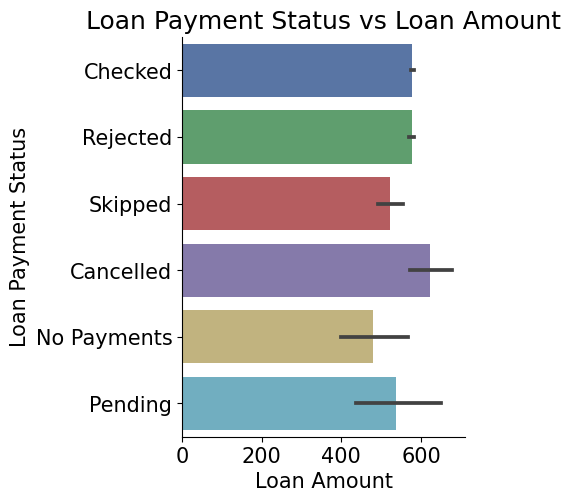

In [240]:
# plot loan payment status against loan amount
sns.catplot(x='loanAmount', y='fpStatus', data=m_l_p, kind='bar')
plt.title('Loan Payment Status vs Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Loan Payment Status')
plt.show()

In [241]:
m_l_p.dtypes

loanId                               object
anon_ssn                             object
payFrequency                         object
apr                                 float64
applicationDate                      object
originated                             bool
originatedDate                       object
nPaidOff                            float64
approved                               bool
isFunded                              int64
loanStatus                           object
loanAmount                          float64
originallyScheduledPaymentAmount    float64
state                                object
leadType                             object
leadCost                              int64
fpStatus                             object
underwritingid                       object
hasCF                                 int64
installmentIndex                    float64
isCollection                         object
paymentDate                          object
principal                       

In [242]:
# Convert the datatype of the column "paymentDate" from object to datetime
complete1['paymentDate'] = pd.to_datetime(complete1['paymentDate'], format='%Y-%m-%dT%H:%M:%S')

In [243]:
print(complete1['paymentDate'].dtype)

datetime64[ns]


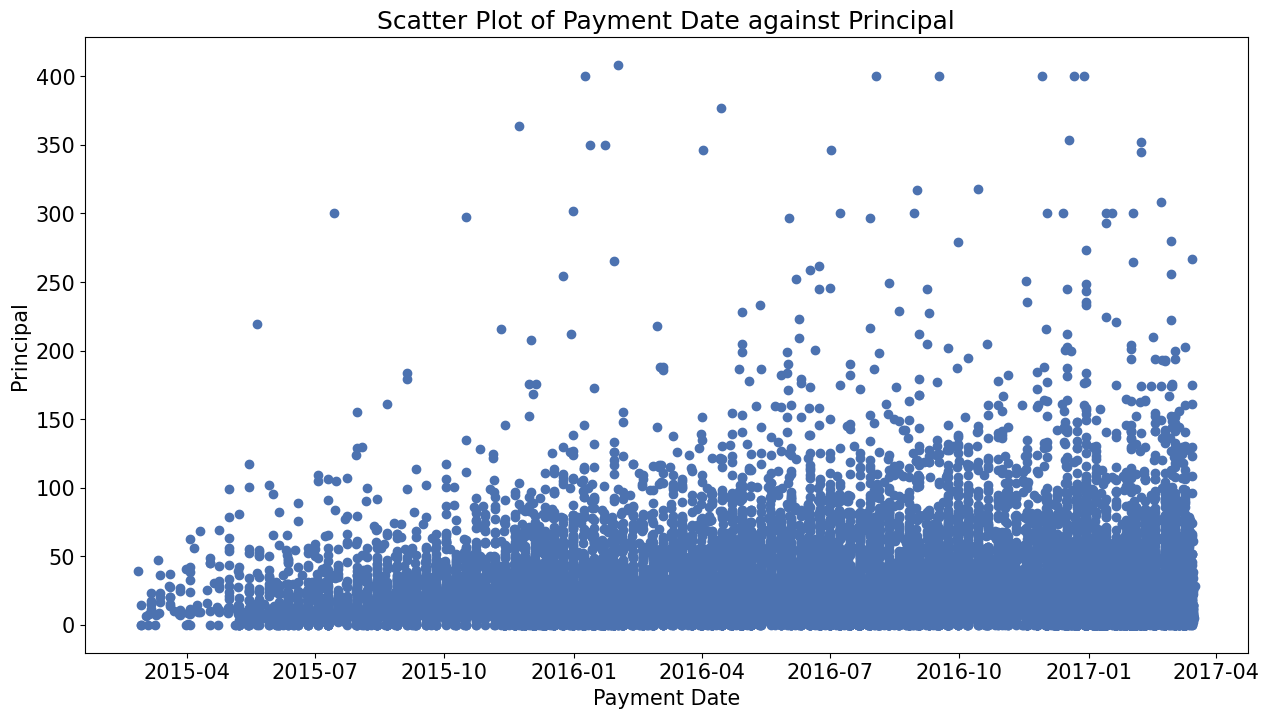

In [244]:
# create a scatter plot of paymentdate against principal
plt.figure(figsize=(15,8))
plt.scatter(complete1['paymentDate'], complete1['principal'])
plt.xlabel('Payment Date')
plt.ylabel('Principal')
plt.title('Scatter Plot of Payment Date against Principal')
plt.show()

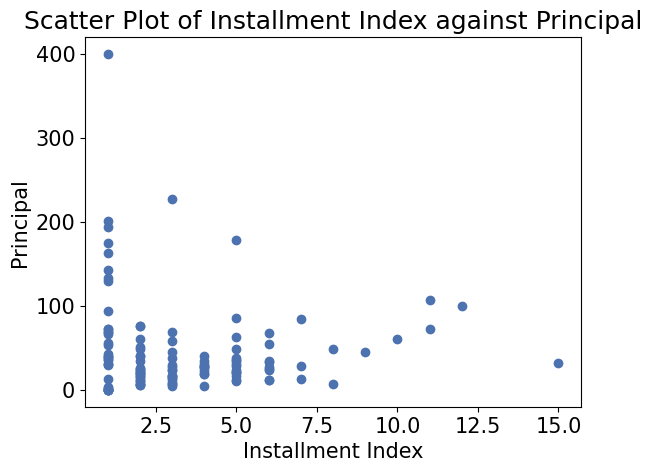

In [245]:
# create a scatter plot of principal against installment index
plt.scatter(complete
            ['installmentIndex'], complete['principal'])
plt.xlabel('Installment Index')
plt.ylabel('Principal')
plt.title('Scatter Plot of Installment Index against Principal')
plt.show()

In [246]:
#Principal is the amount borrowed and the installment index is the number of payment made.
#outlier is someone paid 40 times for a small amount of loan

In [247]:
# Calculate mean, median, mode, and standard deviation for numeric variables
complete1.describe()

,apr,nPaidOff,isFunded,loanAmount,originallyScheduledPaymentAmount,leadCost,hasCF,installmentIndex,principal,fees,...,inquiry.onehourago,inquiry.ninetydaysago,inquiry.sevendaysago,inquiry.tenminutesago,inquiry.fifteendaysago,inquiry.threesixtyfivedaysago,indicator.totalnumberoffraudindicators,indicator.maxnumberofssnswithanybankaccount,identityverification.overallmatchreasoncode,clearfraudscore
count,42426.000000,42426.000000,42426.000000,42426.000000,42426.000000,42426.000000,42426.0,25418.000000,25418.000000,25418.000000,...,42260.000000,42260.000000,42260.000000,42260.000000,42260.000000,42260.000000,42239.000000,42239.000000,42225.000000,42124.000000
mean,544.586350,0.156908,0.999552,578.066598,1617.493216,13.147834,1.0,5.004170,24.254883,83.667806,...,4.046900,11.048888,5.619759,3.287269,6.423000,21.067250,2.155614,7.540804,11.808194,672.743638
std,114.176123,0.558187,0.021158,300.259408,867.319328,20.464324,0.0,4.448927,29.715221,55.251326,...,2.787823,10.935370,4.337151,2.167049,5.243534,24.411051,1.270023,86.274864,14.167378,128.071476
min,29.990000,0.000000,0.000000,100.000000,188.410000,0.000000,1.0,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,122.000000
25%,475.000000,0.000000,1.000000,375.000000,1064.180000,3.000000,1.0,2.000000,7.090000,45.260000,...,3.000000,4.000000,3.000000,2.000000,3.000000,6.000000,1.000000,1.000000,1.000000,580.000000
50%,590.000000,0.000000,1.000000,500.000000,1363.640000,6.000000,1.0,4.000000,14.750000,71.090000,...,3.000000,7.000000,4.000000,3.000000,5.000000,13.000000,2.000000,1.000000,11.000000,678.000000
75%,625.000000,0.000000,1.000000,700.000000,1897.630000,25.000000,1.0,7.000000,30.507500,105.057500,...,5.000000,14.000000,7.000000,4.000000,8.000000,26.000000,3.000000,2.000000,15.000000,774.000000
max,681.000000,20.000000,1.000000,2050.000000,8210.680000,200.000000,1.0,42.000000,408.450000,431.350000,...,35.000000,143.000000,64.000000,35.000000,76.000000,438.000000,8.000000,4056.000000,125.000000,965.000000


## Merged with 3 tables(Complete)

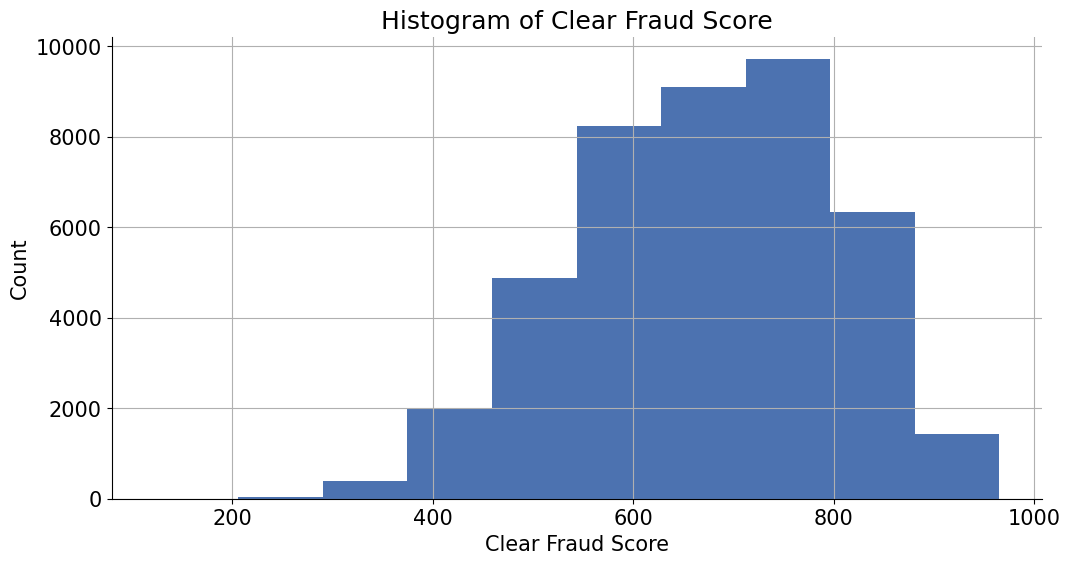

In [248]:
# Plot a histogram for the target variable 'clearfraudscore'
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(12,6))
plt.grid(True, axis='both')
plt.style.use('seaborn-deep')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.hist(complete1['clearfraudscore'])
plt.xlabel('Clear Fraud Score')
plt.ylabel('Count')
plt.title('Histogram of Clear Fraud Score')
plt.show()

In [249]:
#this left skewed histogram means that majority of the applicants have a low fraud risk score, while only afew have a high fraud risk score.
#most of the applicants have a good credit history, but there are a small number of applicants who may have a higher risk of fraud.
#help us to prioritize our efforts and focus on the high-risk applicants first when making credit decisions.

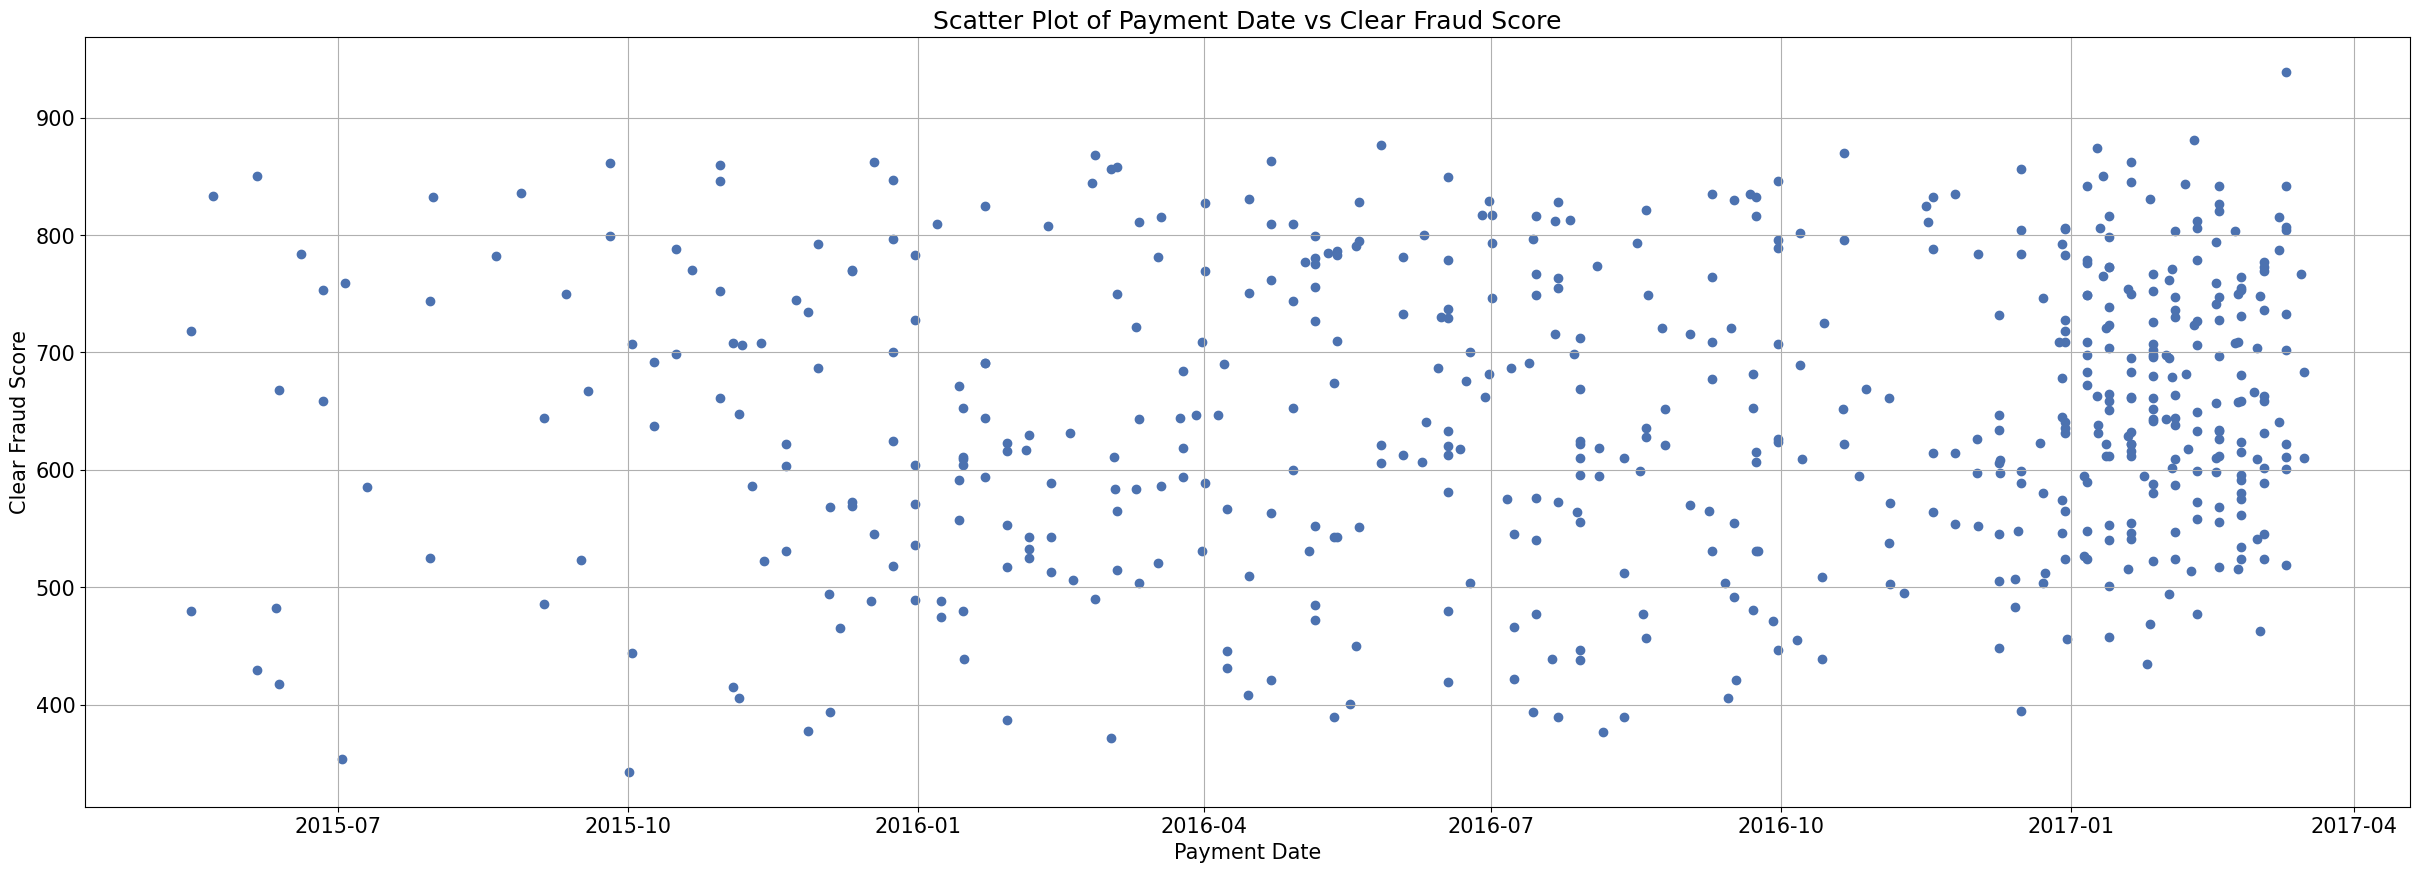

In [250]:
# create a scatter plot of paymentdate vs clearfraudscore

# Specify the sample size
sample_size = 1000

# Randomly select a sample of 1000 rows
complete1_sample = complete1.sample(n=sample_size, random_state=0)

plt.figure(figsize=(30,10))
plt.scatter(complete1_sample ['paymentDate'], complete1_sample['clearfraudscore'])
plt.rcParams.update({'font.size': 15})
plt.grid(True, axis='both')
plt.style.use('seaborn-deep')
plt.xlabel('Payment Date')
plt.ylabel('Clear Fraud Score')
plt.title('Scatter Plot of Payment Date vs Clear Fraud Score')
plt.show()



In [251]:
#As paymentdate increases, the clearfraudscore also increases, which means that the risk of the applicants is higher as they make payments more frequently or on-time. 
#but from the graph above evertything looks neutral.

In [252]:
# calculate the correlation between clearfraudscore and other variables
corr = complete1.corr()
print(corr['clearfraudscore'].sort_values(ascending=False))

clearfraudscore                                1.000000
loanAmount                                     0.438414
originallyScheduledPaymentAmount               0.389679
paymentAmount                                  0.314060
inquiry.oneminuteago                           0.304461
leadCost                                       0.299986
fees                                           0.261606
principal                                      0.201419
nPaidOff                                       0.063886
installmentIndex                               0.051241
inquiry.tenminutesago                          0.005736
indicator.maxnumberofssnswithanybankaccount   -0.036128
identityverification.overallmatchreasoncode   -0.105389
apr                                           -0.108640
inquiry.onehourago                            -0.164589
indicator.totalnumberoffraudindicators        -0.224715
inquiry.twentyfourhoursago                    -0.272254
inquiry.threesixtyfivedaysago                 -0

In [253]:
#loanammount has the strongest relationship with clearfraudscore


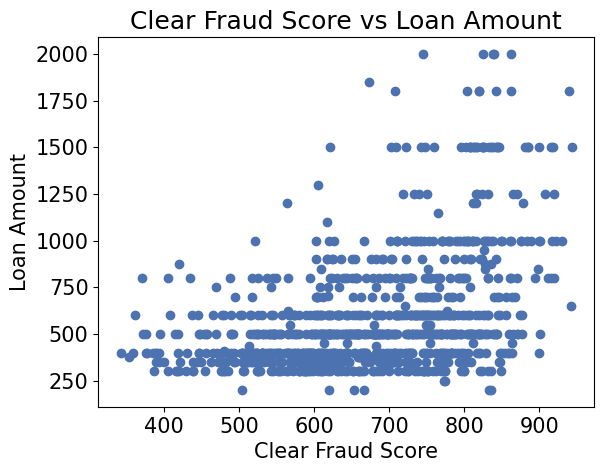

In [254]:
# Create a scatter plot between clearfraudscore and loanAmount
plt.scatter(complete1_sample['clearfraudscore'], complete1_sample['loanAmount'])
plt.xlabel('Clear Fraud Score')
plt.ylabel('Loan Amount')
plt.title('Clear Fraud Score vs Loan Amount')
plt.show()

In [255]:
#there is a positive correlation, this means that higher clearfraudscore values are associated with higher loanAmount values

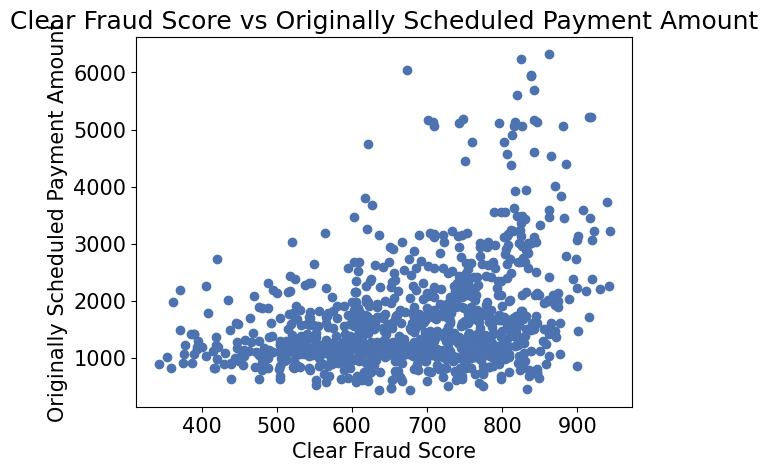

In [256]:
# Create a scatter plot between clearfraudscore and originallyScheduledPaymentAmount
plt.scatter(complete1_sample['clearfraudscore'], complete1_sample['originallyScheduledPaymentAmount'])
plt.xlabel('Clear Fraud Score')
plt.ylabel('Originally Scheduled Payment Amount')
plt.title('Clear Fraud Score vs Originally Scheduled Payment Amount')
plt.show()

In [257]:
#there is a positive correlation, this means that higher clearfraudscore values are associated with higher Originally Scheduled Payment Amount

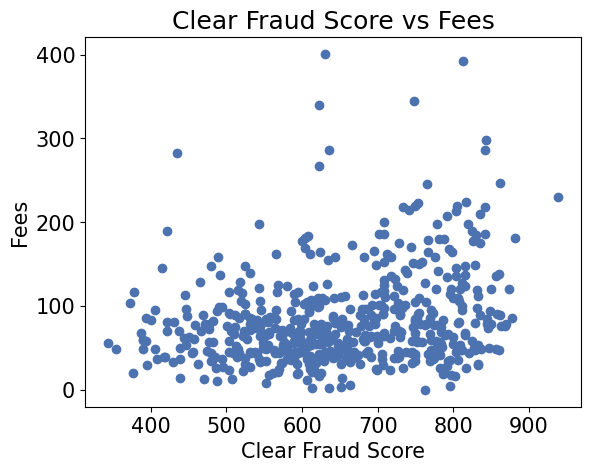

In [258]:
# Create a scatter plot between clearfraudscore and fees
plt.scatter(complete1_sample['clearfraudscore'], complete1_sample['fees'])
plt.xlabel('Clear Fraud Score')
plt.ylabel('Fees')
plt.title('Clear Fraud Score vs Fees')
plt.show()

In [259]:
#there is a positive correlation, this means that higher clearfraudscore values are associated with higher fees values.

In [350]:
complete1.to_csv(r'E:/python\moneylionfinal.csv', index=False)

In [262]:
import pandas as pd
import numpy as np

In [269]:
# create the loanRepayment variable
complete1["loanRepayment"] = complete1["loanStatus"].apply(lambda x: 1 if x == "Paid Off Loan" else 0)

In [270]:
#loan repayment =1 means that the loan is paid, while 0 means external collection, internal collection, new loan, returned item, settlement paid off, settled bankruptcy, Withdrawn Application.

In [271]:
# calculate the correlation between clearfraudscore and other variables
corr = complete1.corr()
print(corr['loanRepayment'].sort_values(ascending=False))

loanRepayment                                  1.000000
clearfraudscore                                0.165144
nPaidOff                                       0.165123
installmentIndex                               0.161123
principal                                      0.113518
loanAmount                                     0.034928
leadCost                                       0.028887
approved                                       0.011339
isFunded                                       0.011339
inquiry.twentyfourhoursago                    -0.001407
inquiry.onehourago                            -0.002078
paymentAmount                                 -0.003560
inquiry.tenminutesago                         -0.011068
inquiry.sevendaysago                          -0.012502
indicator.maxnumberofssnswithanybankaccount   -0.012664
originallyScheduledPaymentAmount              -0.014789
inquiry.oneminuteago                          -0.018780
inquiry.fifteendaysago                        -0

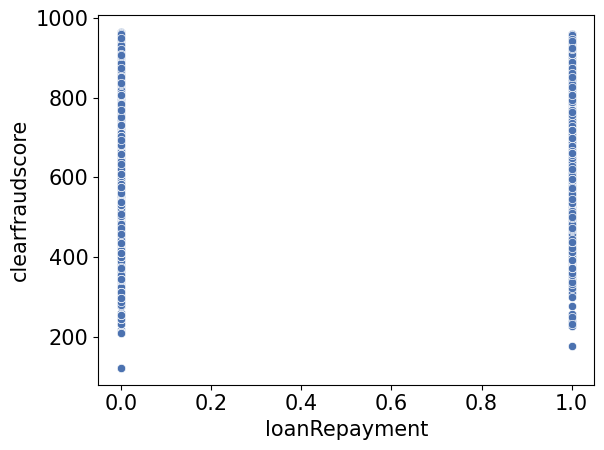

In [284]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='loanRepayment', y='clearfraudscore', data=complete1)
plt.show()

In [286]:
import pandas as pd

correlation = complete1['loanRepayment'].corr(complete1['clearfraudscore'])
print('The Pearson correlation between loanRepayment and clearfraudscore is:', correlation)

The Pearson correlation between loanRepayment and clearfraudscore is: 0.1651436080317879


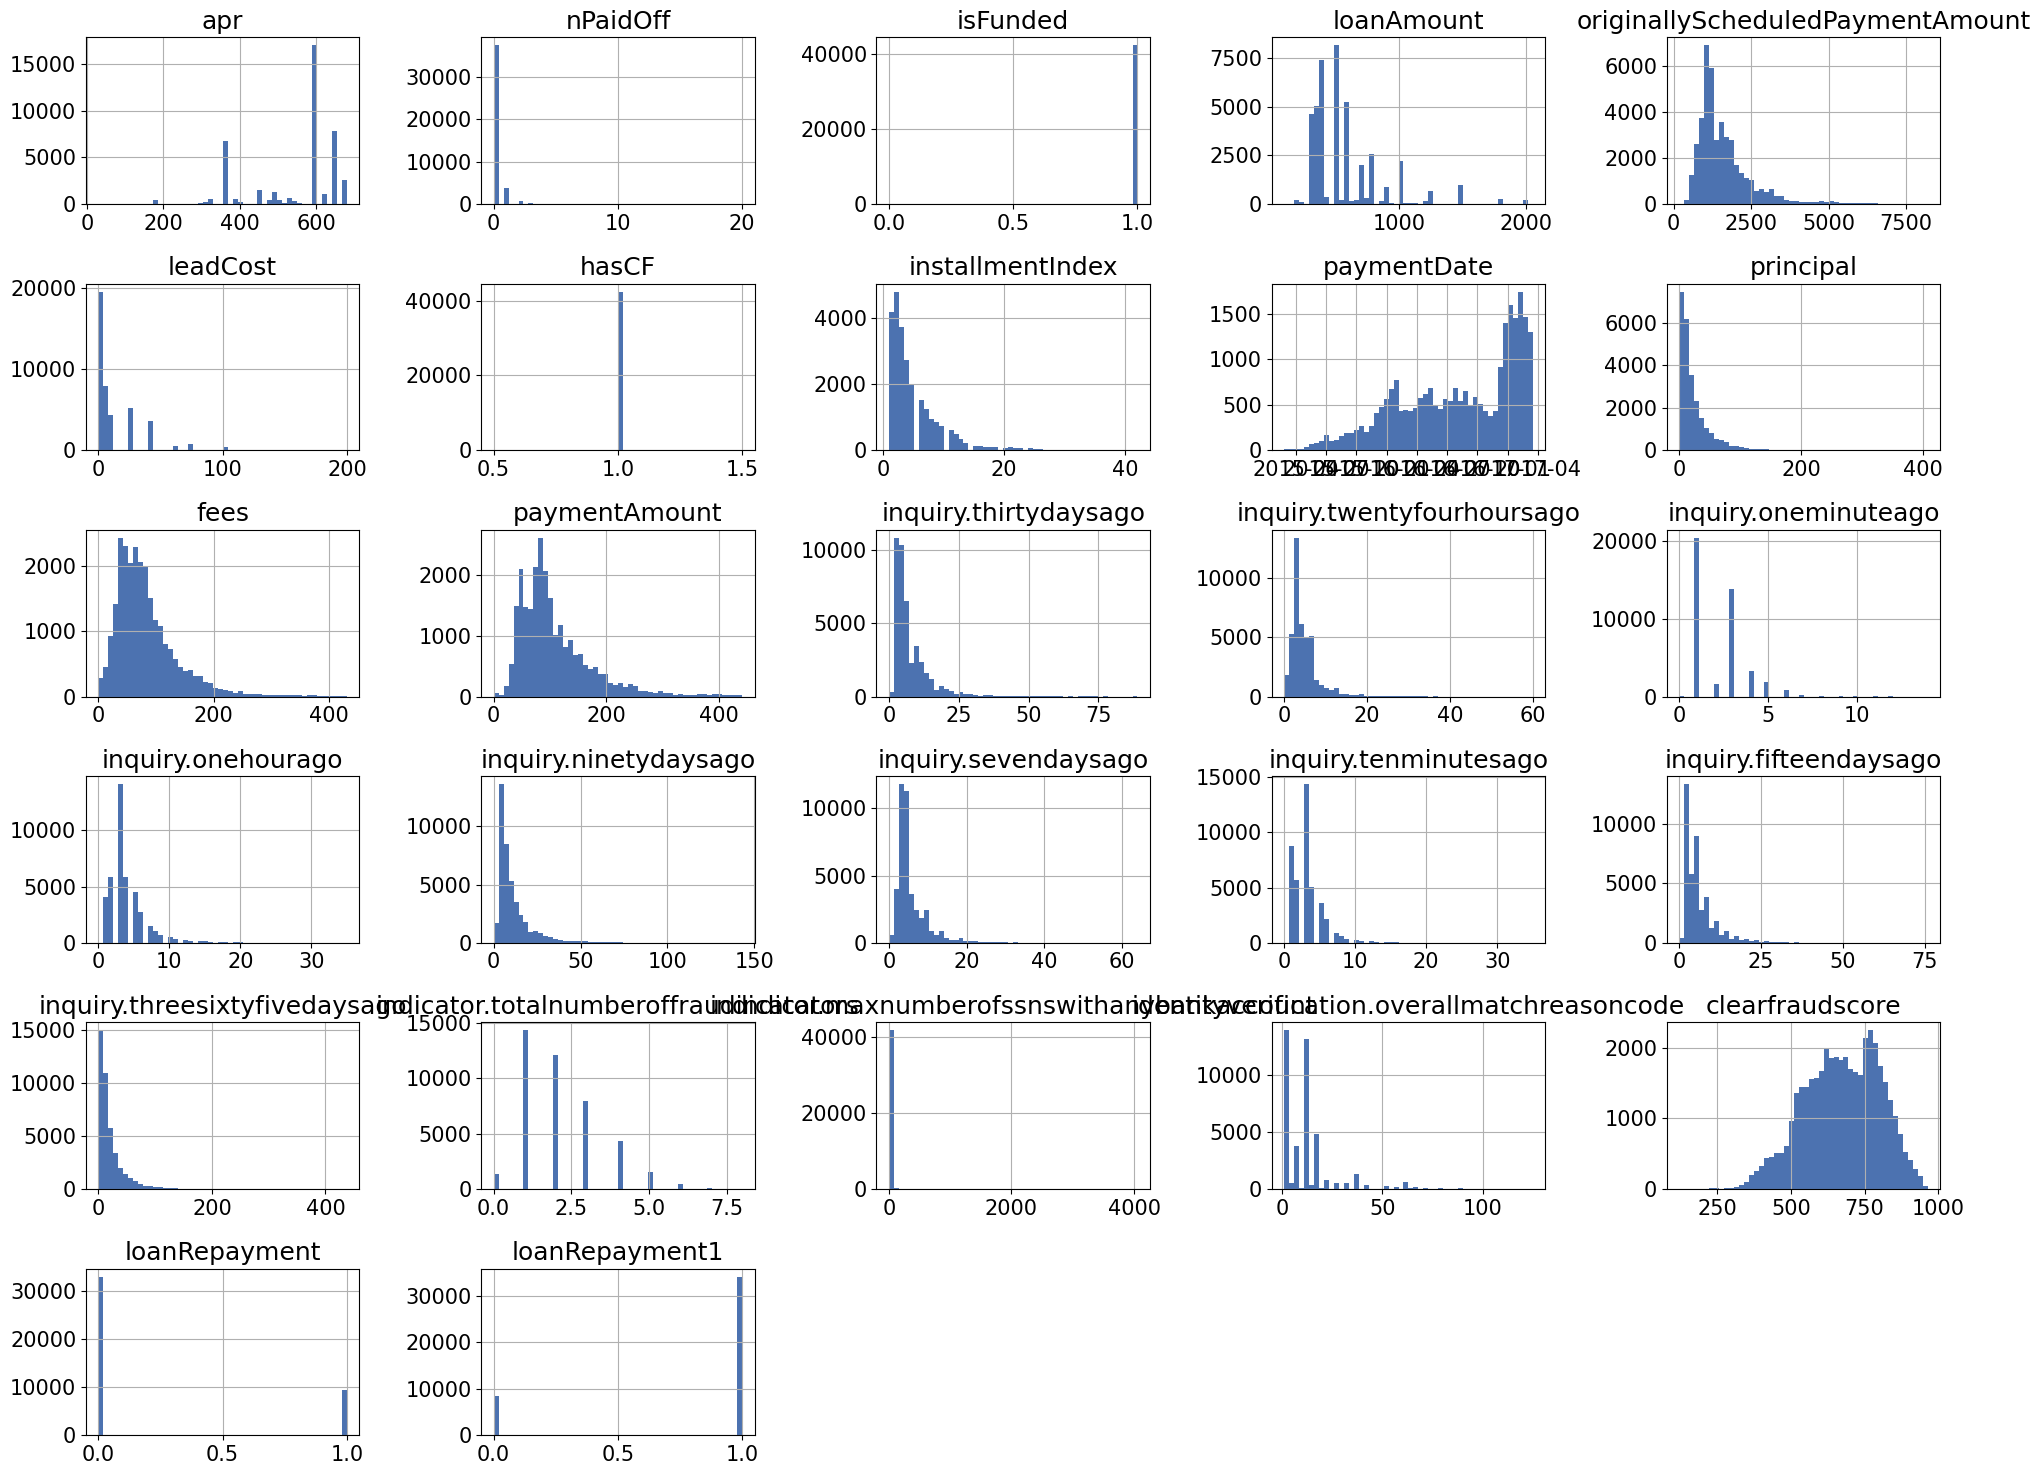

In [302]:
complete1.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

In [307]:
complete1['clearfraudscore'] = np.exp(complete1['clearfraudscore'])

# loan repayment

In [320]:
import pandas as pd


# Create a function to calculate loan repayment based on payment amount and loan status
def calculate_loan_repayment(paymentAmount, fpStatus):
    if fpStatus == 'Checked':
        return paymentAmount
    else:
        return 0

# Apply the function to the payment amount and loan status columns in the merged table
complete1['loan_repayment'] = complete1.apply(lambda x: calculate_loan_repayment(x['paymentAmount'], x['fpStatus']), axis=1)

##### Loan Repayment is a variable that helps to understand the behavior of a loan borrower's repayment history. It indicates the status of loan repayment, which can be either a checked repayment or an unsuccessful repayment. The variable is created based on the payment amount and loan status. If the payment amount is equal to the loan amount, then the loan repayment is considered as a successful repayment. If the payment amount is less than the loan amount, then it is considered as an unsuccessful repayment. This variable is useful in understanding the loan repayment performance of the borrowers, which can be used to make better lending decisions, price loans accurately, and mitigate losses.

In [321]:
#create a new variable called loan_repayment in the merged table. If the loan status is "Checked", the loan_repayment will be equal to the payment_amount, otherwise it will be equal to 0.

In [324]:
# calculate the correlation between clearfraudscore and other variables
corr = complete1.corr()
print(corr['loan_repayment'].sort_values(ascending=False))

loan_repayment                                 1.000000
paymentAmount                                  0.492475
fees                                           0.400958
loanAmount                                     0.359301
originallyScheduledPaymentAmount               0.345544
principal                                      0.320987
clearfraudscore                                0.183889
installmentIndex                               0.153745
nPaidOff                                       0.109219
leadCost                                       0.069900
inquiry.oneminuteago                           0.061964
loanRepayment                                  0.039474
isFunded                                       0.027197
approved                                       0.027197
apr                                            0.022723
inquiry.tenminutesago                          0.012565
indicator.maxnumberofssnswithanybankaccount    0.003339
inquiry.onehourago                            -0

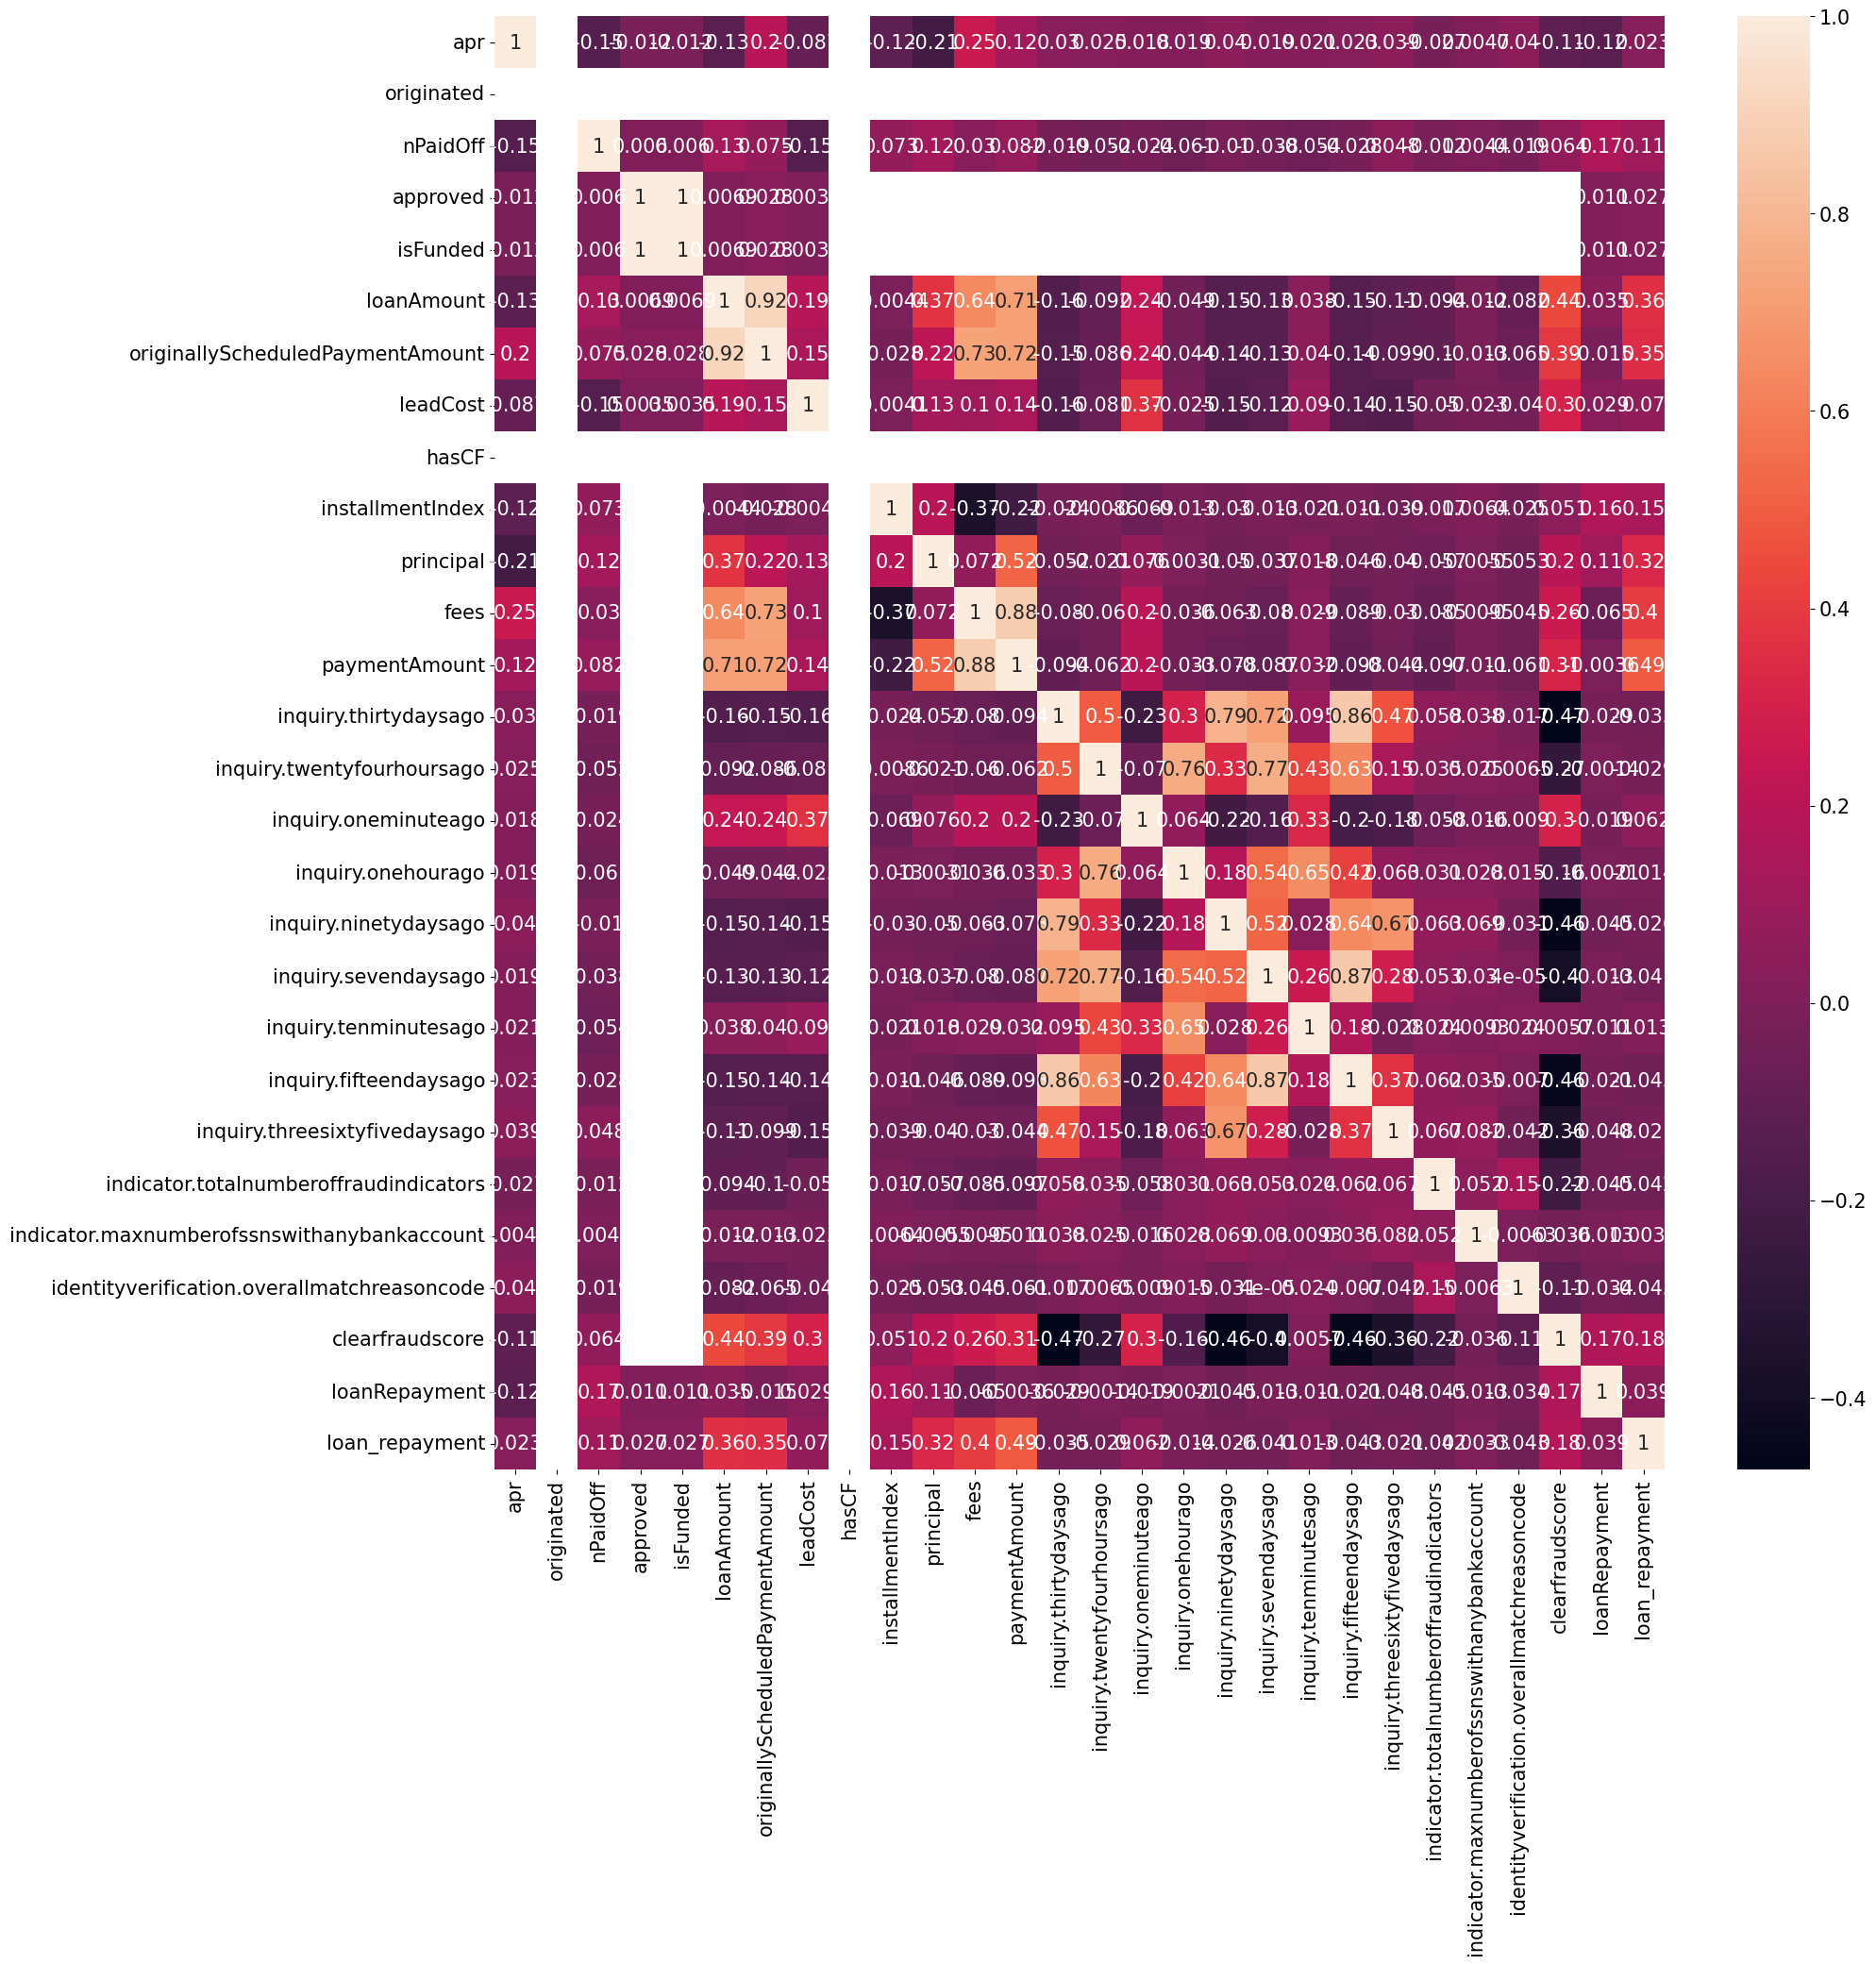

In [348]:
# Correlation Matrix
corr = complete1.corr()

# Heatmap
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True)
plt.show()

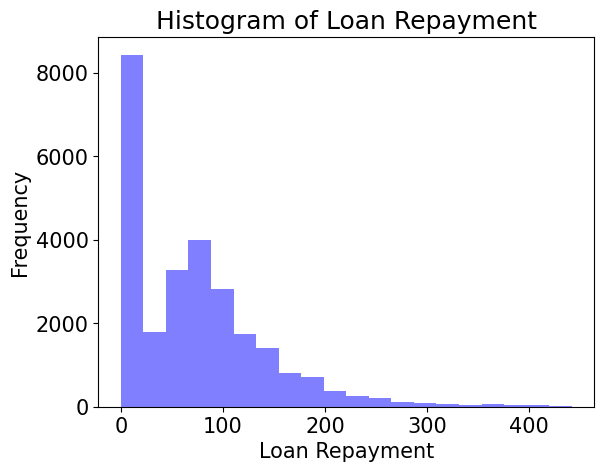

In [326]:
import matplotlib.pyplot as plt

# Create a histogram
plt.hist(complete1['loan_repayment'], bins=20, color='blue', alpha=0.5)
plt.xlabel('Loan Repayment')
plt.ylabel('Frequency')
plt.title('Histogram of Loan Repayment')
plt.show()


In [332]:
#This histogram is right-skewed means most of the data points  have a lower value, and there are fewer observations with a higher value. The majority of the loans have a low repayment rate, while there is a small percentage of loans with higher repayment amounts 


<AxesSubplot:xlabel='loan_repayment'>

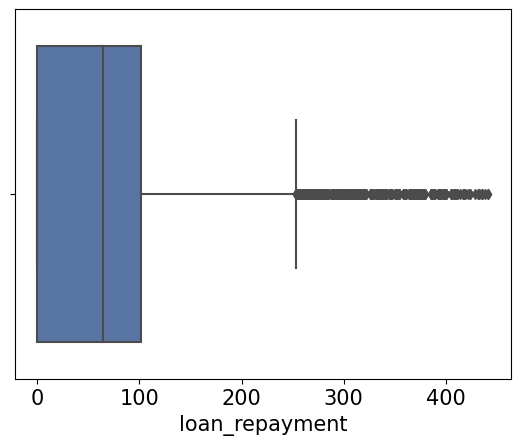

In [336]:
import seaborn as sns
sns.boxplot(x = complete1['loan_repayment'])


In [337]:
#the loan repayment is mostly concentrated on lower values, meaning there are fewer high-repayment loans in the data set.

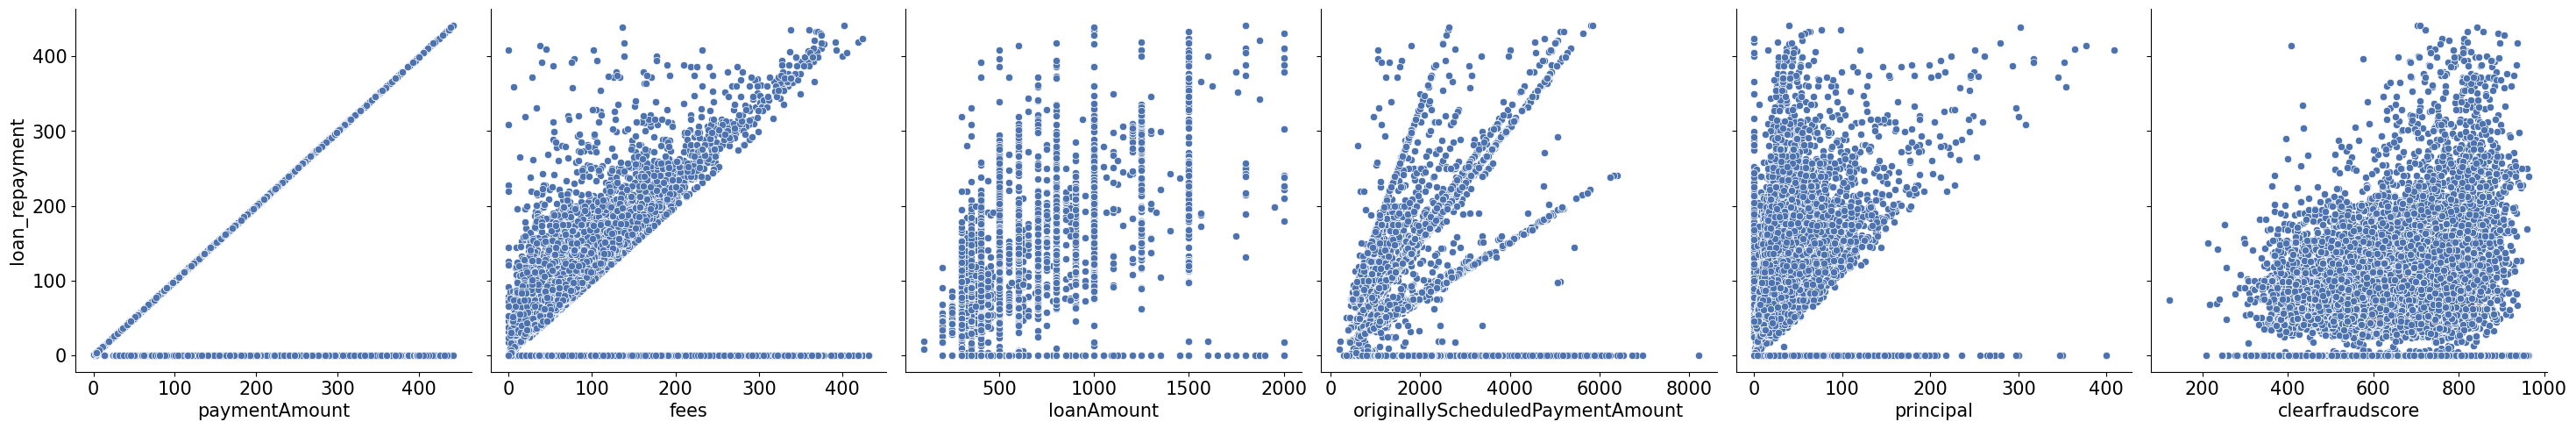

In [571]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.pairplot(complete1, x_vars=["paymentAmount", "fees", "loanAmount", "originallyScheduledPaymentAmount", "principal", "clearfraudscore"], y_vars=["loan_repayment"], height=5)
plt.show()

In [560]:
#all of them have strong positive relationship with loan_repayment

# Machine Learning Model

# LInear Regrssion

In [532]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the merged data into a dataframe
model4 = pd.read_excel("E:/Python\money.xlsx")


In [533]:
model4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42403 entries, 0 to 42402
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   nPaidOff                          42403 non-null  int64  
 1   isFunded                          42403 non-null  int64  
 2   loanAmount                        42403 non-null  float64
 3   originallyScheduledPaymentAmount  42403 non-null  float64
 4   leadCost                          42403 non-null  int64  
 5   installmentIndex                  42403 non-null  int64  
 6   principal                         42403 non-null  float64
 7   fees                              42403 non-null  float64
 8   paymentAmount                     42403 non-null  float64
 9   clearfraudscore                   42403 non-null  float64
 10  loan_repayment                    42403 non-null  float64
dtypes: float64(7), int64(4)
memory usage: 3.6 MB


In [535]:
# Split the data into training and testing sets
train_data, test_data, train_target, test_target = train_test_split(model4.drop('loan_repayment', axis=1), model4['loan_repayment'], test_size=0.2)

# Fit the linear regression model to the training data
reg = LinearRegression().fit(train_data, train_target)

# Use the trained model to predict the loan_repayment on the testing set
test_predict = reg.predict(test_data)

# Calculate the mean squared error between the actual loan_repayment and the predicted values
mse = mean_squared_error(test_target, test_predict)
print("Mean Squared Error: ", mse)

Mean Squared Error:  1994.0747157376127


# Random Forest Regressor

In [544]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Extract the features and target variable
X = model4.drop(['loan_repayment'], axis=1)
y = model4['loan_repayment']


In [545]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [546]:
# Create a random forest regressor model
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

In [547]:
# Train the model
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [548]:
# Make predictions on the testing set
y_pred = rf.predict(X_test)

# Mean squared error

In [553]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean squared error: {mse}')

Mean squared error: 934.5586802427705


In [554]:
#The mean squared error (MSE) is a commonly used evaluation metric for regression models. It measures the average of the squared differences between the predicted and actual values of the target variable. A smaller MSE indicates a better fit of the model to the data.

#MSE is useful because it penalizes larger errors more than smaller ones, as it involves squaring the difference between predicted and actual values. This makes it sensitive to outliers and can help identify areas of the model that may need improvement.

#Additionally, MSE is easily interpretable and widely used, making it a common choice for measuring the accuracy of regression models.

# root mean squared error (RMSE)

In [557]:
from sklearn.metrics import mean_squared_error

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("RMSE: ", rmse)

RMSE:  30.570552501431347


In [558]:
#RMSE of 30.57 might be considered accurate

In [561]:
#there is a slight pattern where there is a line below 0, this could indicate bias, meaning that model is consistently overestimating and underestimating loan_repayment  and the residuals are not randomly distributed around zero.

In [562]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# X and y are the input and output data, respectively
model = LinearRegression()
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Print the average RMSE score across all folds
print("Average RMSE:", np.sqrt(-scores.mean()))


Average RMSE: 44.65161258179164


In [564]:
#In this example, we are using a linear regression model and the negative mean squared error as the evaluation metric. The cv parameter specifies the number of folds to use, and the scoring parameter specifies the metric to use for evaluation. The cross_val_score() function returns an array of scores for each fold, and we use the average RMSE as the final performance metric.

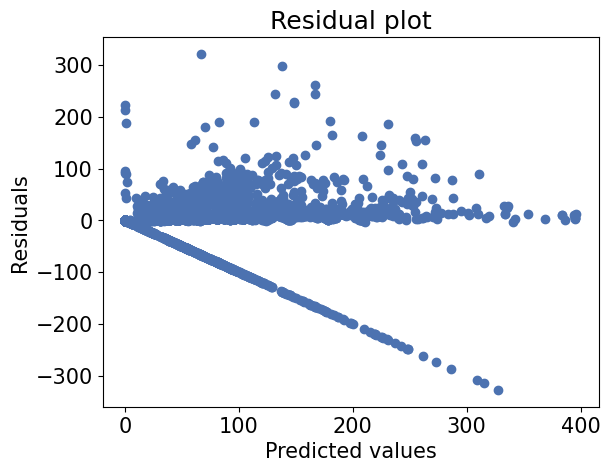

In [559]:
import matplotlib.pyplot as plt

# Get the predicted values and actual values
y_pred = rf.predict(X_test)
residuals = y_test - y_pred

# Plot the residuals against the predicted values
plt.scatter(y_pred, residuals)
plt.title("Residual plot")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.show()